In [15]:
import scipy.io as sciio
import numpy as np

bg = sciio.loadmat("PSF_bk.mat")
psf_bk = np.float32(bg["psf_bk"])

psf = list()
for i in [1550,1560,1570,1580,1590,1600]:
    img = sciio.loadmat("PSF0620_{}_04_4_40.mat".format(i))
    psf.append(np.float32(img["PSF0"]))

psf = np.array(psf, dtype="float")
print(np.max(psf), np.min(psf))
psf /= (np.max(psf) - np.min(psf))
psf = psf - np.min(psf)
print(psf.shape, np.max(psf), np.min(psf))
np.save("PSF0620_04_4_40.npy", psf[:, 140:140+256, 210:210+256])
np.save("PSF0620_04_4_40_bg.npy", psf_bk[140:140+256, 210:210+256])


997.0 -150.0
(6, 512, 640) 1.0 0.0


(6, 256, 256)
(256, 256)


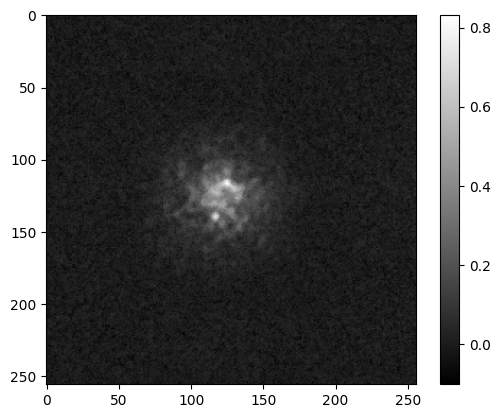

In [3]:
import matplotlib.pyplot as plt
import numpy as np 
psf = np.load("PSF0620_04_4_40.npy")
psf_bg = np.load("PSF0620_04_4_40_bg.npy")
print(psf.shape)
print(psf_bg.shape)
plt.imshow(psf[5,:,:] ,cmap="gray")
plt.colorbar()

点扩散函数显示

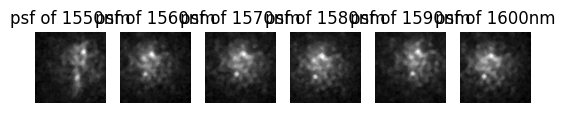

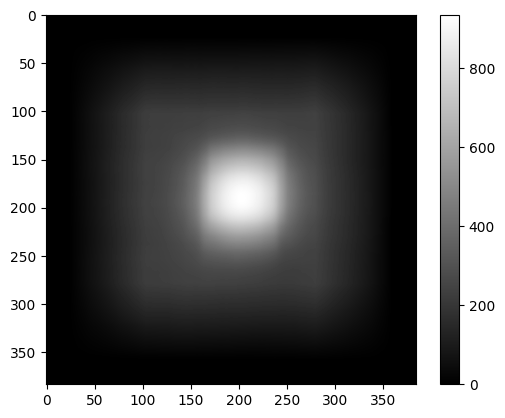

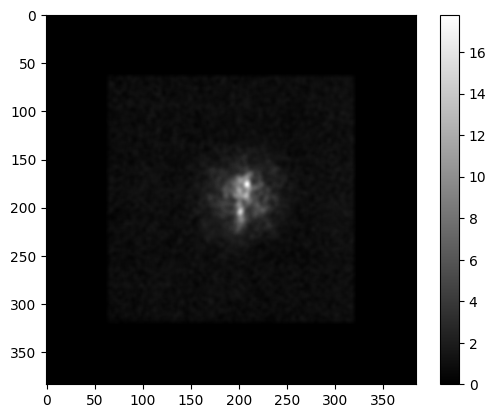

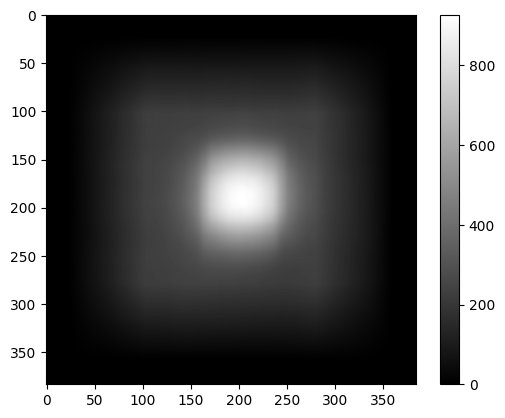

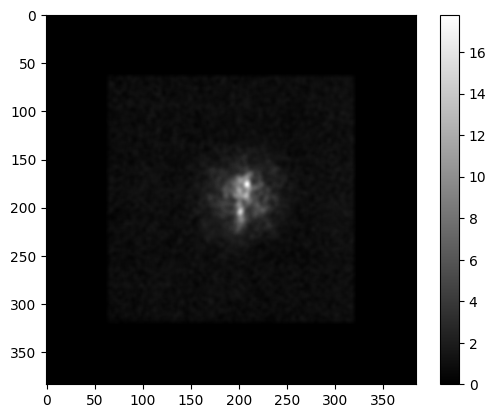

<function matplotlib.pyplot.show(close=None, block=None)>

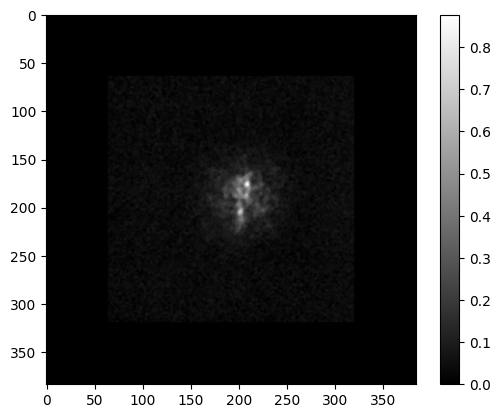

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

def fft_calc(img,psf):
    point_source_fft = np.fft.fft2(np.fft.ifftshift(img)) 
    otf_fft = np.fft.fft2(np.fft.ifftshift(psf))

    fft_dot = np.multiply(point_source_fft, otf_fft)
    
    point_image = np.fft.ifft2(fft_dot)
    point_image = np.fft.fftshift(point_image)
    point_image_amp = np.abs(point_image)
    return point_image_amp



psf = np.load("PSF0620_04_4_40.npy")
wave = [1550,1560,1570,1580,1590,1600]

s = 90
w = 80
fig, ax = plt.subplots(1,6)
for i in range(6):
    ax[i].imshow(psf[i,s:s+w,s:s+w], cmap="gray")
    ax[i].axis("off")
    ax[i].set_title("psf of {}nm".format(wave[i]))
plt.rcParams['figure.figsize'] = (20.0, 16.0) 
plt.show()

np.ravel(psf,)
for i in range(5):
    # cv2.imwrite("{}.png".format(i),psf[i,:,:] * 255)
    coff = np.corrcoef(psf[0,s:s+w,s:s+w].ravel() , psf[i,s:s+w,s:s+w].ravel() )
    # print(coff)


psf = psf[0,:]
psf = np.pad(psf,[64,64])
obj = np.zeros([384,384])
obj[152:232,152:232] = 1

part = np.zeros([384,384])
part[152:232,152:232] = 1
part[190:195,190:195] = 0


pt = np.zeros([384,384])
pt[190:195,190:195]=1
obj_psf = fft_calc(obj,psf)
plt.imshow(obj_psf,cmap="gray")
plt.colorbar()
plt.show()
pt_psf = fft_calc(pt,psf)
plt.imshow(pt_psf,cmap="gray")
plt.colorbar()
plt.show()
part_psf = fft_calc(part,psf)
plt.imshow(part_psf,cmap="gray")
plt.colorbar()
plt.show()

delta = obj_psf - part_psf
plt.imshow(delta,cmap="gray")
plt.colorbar()
plt.show()

plt.imshow(psf,cmap="gray")
plt.colorbar()
plt.show